In [1]:
####训练集产生
import random
class AES:
    MIX_C  = [[0x2, 0x3, 0x1, 0x1], [0x1, 0x2, 0x3, 0x1], [0x1, 0x1, 0x2, 0x3], [0x3, 0x1, 0x1, 0x2]]
    I_MIXC = [[0xe, 0xb, 0xd, 0x9], [0x9, 0xe, 0xb, 0xd], [0xd, 0x9, 0xe, 0xb], [0xb, 0xd, 0x9, 0xe]]
    RCon   = [0x01000000, 0x02000000, 0x04000000, 0x08000000, 0x10000000, 0x20000000, 0x40000000, 0x80000000, 0x1B000000, 0x36000000]

    S_BOX = [[0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76],
             [0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0],
             [0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15],
             [0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75],
             [0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84],
             [0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF],
             [0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8],
             [0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2],
             [0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73],
             [0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB],
             [0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79],
             [0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08],
             [0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A],
             [0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E],
             [0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF],
             [0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16]]

    I_SBOX = [[0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB],
              [0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB],
              [0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E],
              [0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25],
              [0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92],
              [0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84],
              [0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06],
              [0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B],
              [0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73],
              [0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E],
              [0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B],
              [0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4],
              [0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F],
              [0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF],
              [0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61],
              [0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D]]

    def SubBytes(self, State):
        # 字节替换
        return [self.S_BOX[i][j] for i, j in 
               [(_ >> 4, _ & 0xF) for _ in State]]

    def SubBytes_Inv(self, State):
        # 字节逆替换
        return [self.I_SBOX[i][j] for i, j in
               [(_ >> 4, _ & 0xF) for _ in State]]

    def ShiftRows(self, S):
        # 行移位
        return [S[ 0], S[ 5], S[10], S[15], 
                S[ 4], S[ 9], S[14], S[ 3],
                S[ 8], S[13], S[ 2], S[ 7],
                S[12], S[ 1], S[ 6], S[11]]

    def ShiftRows_Inv(self, S):
        # 逆行移位
        return [S[ 0], S[13], S[10], S[ 7],
                S[ 4], S[ 1], S[14], S[11],
                S[ 8], S[ 5], S[ 2], S[15],
                S[12], S[ 9], S[ 6], S[ 3]]

    def MixColumns(self, State):
        # 列混合
        return self.Matrix_Mul(self.MIX_C, State)

    def MixColumns_Inv(self, State):
        # 逆列混合
        return self.Matrix_Mul(self.I_MIXC, State)

    def RotWord(self, _4byte_block):
        # 用于生成轮密钥的字移位
        return ((_4byte_block & 0xffffff) << 8) + (_4byte_block >> 24)

    def SubWord(self, _4byte_block):
        # 用于生成密钥的字节替换
        result = 0
        for position in range(4):
            i = _4byte_block >> position * 8 + 4 & 0xf
            j = _4byte_block >> position * 8 & 0xf
            result ^= self.S_BOX[i][j] << position * 8
        return result

    def mod(self, poly, mod = 0b100011011):  
        # poly模多项式mod
        while poly.bit_length() > 8:
            poly ^= mod << poly.bit_length() - 9
        return poly

    def mul(self, poly1, poly2):
        # 多项式相乘
        result = 0
        for index in range(poly2.bit_length()):
            if poly2 & 1 << index:
                result ^= poly1 << index
        return result

    def Matrix_Mul(self, M1, M2):  # M1 = MIX_C  M2 = State
        # 用于列混合的矩阵相乘
        M = [0] * 16
        for row in range(4):
            for col in range(4):
                for Round in range(4):
                    M[row + col*4] ^= self.mul(M1[row][Round], M2[Round+col*4])
                M[row + col*4] = self.mod(M[row + col*4])
        return M

    def round_key_generator(self, _16bytes_key):
        # 轮密钥产生
        w = [_16bytes_key >> 96, 
             _16bytes_key >> 64 & 0xFFFFFFFF, 
             _16bytes_key >> 32 & 0xFFFFFFFF, 
             _16bytes_key & 0xFFFFFFFF] + [0]*40
        for i in range(4, 44):
            temp = w[i-1]
            if not i % 4:
                temp = self.SubWord(self.RotWord(temp)) ^ self.RCon[i//4-1]
            w[i] = w[i-4] ^ temp
        return [self.num_2_16bytes(
                    sum([w[4 * i] << 96, w[4*i+1] << 64, 
                         w[4*i+2] << 32, w[4*i+3]])
                    ) for i in range(8)]

    def AddRoundKey(self, State, RoundKeys, index):
        # 异或轮密钥
        return self._16bytes_xor(State, RoundKeys[index])

    def _16bytes_xor(self, _16bytes_1, _16bytes_2):
        return [_16bytes_1[i] ^ _16bytes_2[i] for i in range(16)]

    def _16bytes2num(cls, _16bytes):
        # 16字节转数字
        return int.from_bytes(_16bytes, byteorder = 'big')

    def num_2_16bytes(cls, num):
        # 数字转16字节
        return num.to_bytes(16, byteorder = 'big')

    def aes_encrypt(self, plaintext_list, RoundKeys):
        State = plaintext_list
        State = self.AddRoundKey(State, RoundKeys, 0)
        for Round in range(1, 10):
            State = self.SubBytes(State)
            State = self.ShiftRows(State)
            State = self.MixColumns(State)
            State = self.AddRoundKey(State, RoundKeys, Round)
        State = self.SubBytes(State)
        State = self.ShiftRows(State)
        State = self.AddRoundKey(State, RoundKeys, 10)
        return State

    def aes_decrypt(self, ciphertext_list, RoundKeys):
        State = ciphertext_list
        State = self.AddRoundKey(State, RoundKeys, 10)
        for Round in range(1, 10):
            State = self.ShiftRows_Inv(State)
            State = self.SubBytes_Inv(State)
            State = self.AddRoundKey(State, RoundKeys, 10-Round)
            State = self.MixColumns_Inv(State)
        State = self.ShiftRows_Inv(State)
        State = self.SubBytes_Inv(State)
        State = self.AddRoundKey(State, RoundKeys, 0)
        return State
    
    
    def double_int_list2double_binary_list(self, np_input, num):
        np_input_sec = np.zeros((num,128))
        for i in range(len(np_input)):
            binary_list = [format(int(j), '08b') for j in np_input[i]]
            result = [[int(bit) for bit in binary_str] for binary_str in binary_list]
            result = list(chain(*result))
            np_input_sec[i] = result
        return np_input_sec

In [2]:
AesBox=[[0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76], 
                  [ 0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0], 
                   [0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15],
                   [0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75], 
                   [0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84], 
                   [0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf],
                   [0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8],
                   [0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2],
                   [0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73],
                   [0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb], 
                   [0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79], 
                   [0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08], 
                   [0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a], 
                   [0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e], 
                   [0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf],
                   [0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16]]
temp=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# 手动创建一个二维列表
AES_Dif_Value = []
for _ in range(256):
    row = []  # 新建一个空列表作为行[]
    for _ in range(256):
        row.append([])  # 添加元素到行
    AES_Dif_Value.append(row)  # 将行添加到二维列表
    
AesResult=[]
for i in range(256):
    AesResult.append(temp[:])
def AES_Dif():
    for i in range(16):
        for j in range(16):
            for k in range(16):
                for m in range(16):
                    out1=AesBox[i][j]
                    out2=AesBox[k][m]
                    in1=i*16+j
                    in2=k*16+m
                    inchafen=in1^in2
                    outchafen=out1^out2
                    AesResult[inchafen][outchafen]=AesResult[inchafen][outchafen]+1 
                    AES_Dif_Value[inchafen][outchafen] = AES_Dif_Value[inchafen][outchafen]+[[in1,in2]]
def writedocument():
    with open('AESbox.txt','w')as fp:
        for i in range(256):
            for j in range(256):
                fp.write(str(AesResult[i][j]))
                fp.write(' ')
            fp.write('\n')
AES_Dif()
writedocument()   

print(AES_Dif_Value[1][1])
print(AesResult[1][1])

N = 0
for x in AES_Dif_Value:
    for y in x:
        if y == []:
            N = N+1
print(N)

[[206, 207], [207, 206]]
2
33150


In [3]:
import numpy as np

aes = AES()
key = 0x000102030405060708090a0b0c0d0e0f
RoundKeys = aes.round_key_generator(key)

###计算SB前后的值
num = 10000
array_input = np.random.randint(0, 256, size=(num, 16)).astype(np.int32)
array_output = np.ones(num*16).reshape(num,16)
for i in range(num):
    array_output[i,:] = aes.SubBytes(list(array_input[i,:]))
    
###计算差分
array_output = array_output.astype(np.int32)
array_input_dif = np.ones(num*8).reshape(int(num/2),16)
array_output_dif = np.ones(num*8).reshape(int(num/2),16)

for i in range(0,num,2):
    array_input_dif[int(i/2),:] = array_input[i,:] ^ array_input[i+1,:]
    array_output_dif[int(i/2),:] = array_output[i,:] ^ array_output[i+1,:]

In [4]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, random_split
from itertools import chain

np_input = array_input_dif[0,:]
for i in range(int(num/2)):
    np_input = np.vstack((np_input,array_output_dif[i,:]))
    if i+1 < num/2:
        np_input = np.vstack((np_input,array_input_dif[i+1,:]))

np_input_sec = aes.double_int_list2double_binary_list(np_input, num)
torch_input = torch.from_numpy(np_input_sec).view(int(num/2),2,8,16)
#生成输入
np_output = array_input[::2,:]
np_output_sec = aes.double_int_list2double_binary_list(np_output, int(num/2))
torch_output = torch.from_numpy(np_output_sec).view(int(num/2),1,8,16)
#生成输出
dataset = TensorDataset(torch_input,torch_output)

# 定义训练集和测试集的大小
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# 随机划分训练集和测试集
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 可以创建数据加载器，用于在训练中批量加载数据
from torch.utils.data import DataLoader

batch_size = 32  # 定义批量大小
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
import torch
from torch import nn

####网络构建
net = nn.Sequential(
nn.Conv2d(2, 6, kernel_size=4, padding=2, stride=1), #nn.Softmax(dim = 2),
nn.MaxPool2d(kernel_size=4, padding=2, stride=1),
nn.Conv2d(6, 16, kernel_size=4, stride=1), #nn.Softmax(dim = 2),
nn.MaxPool2d(kernel_size=3, padding=1, stride=1),
nn.Flatten(),
nn.Linear(16 * 7 * 15, 256), #nn.Softmax(dim = 2),
nn.Linear(256, 128), #nn.Softmax(dim = 1),
nn.Linear(128, 128))

In [69]:
criterion = nn.BCEWithLogitsLoss()
###criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

L = []
# 训练模型
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()  # 设置模型为训练模式
    for epoch in range(num_epochs):
        for X, y in train_loader:
            X = X.float()
            y = y.float()
            optimizer.zero_grad()
            y_hat = model(X)
            y_hat,y = y_hat.flatten(),y.flatten()
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/10], Loss: {loss.item()}')
        L.append(loss.item())

# 测试模型
def test(model, test_loader, criterion):
    model.eval()  # 设置模型为评估模式
    total_loss = 0.0
    with torch.no_grad():
        for X, y in test_loader:
            X = X.float()
            y = y.float()
            y_hat = model(X)
            y_hat,y = y_hat.flatten(),y.flatten()
            loss = criterion(y_hat, y)
            total_loss += loss.item()
    avg_loss = total_loss / len(test_loader)
    print(f'Average Loss: {avg_loss}')

# 训练和测试模型
train(net, train_loader, criterion, optimizer, num_epochs=10)
test(net, test_loader, criterion)

Epoch [1/10], Loss: 0.7106671929359436
Epoch [2/10], Loss: 0.6978692412376404
Epoch [3/10], Loss: 0.7013876438140869
Epoch [4/10], Loss: 0.6975489258766174
Epoch [5/10], Loss: 0.695985734462738
Epoch [6/10], Loss: 0.693732738494873
Epoch [7/10], Loss: 0.6971867084503174
Epoch [8/10], Loss: 0.6920117139816284
Epoch [9/10], Loss: 0.6960592269897461
Epoch [10/10], Loss: 0.6926919221878052
Average Loss: 0.6967944074422121


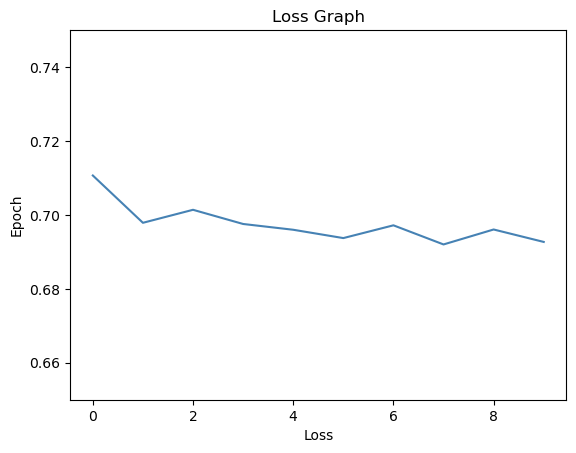

In [73]:
import matplotlib.pyplot as plt

plt.plot(range(len(L)), L, color='#4682B4')
plt.xlabel("Loss")
plt.ylabel("Epoch")
#plt.axhline(y=avg_loss, color='green', linestyle='--', linewidth=0.8, label="Baseline (y=0.5)")
plt.ylim(0.65, 0.75)
plt.title("Loss Graph")
plt.show()

下面进行预测

In [62]:
def Exam():
    net.eval()
    tensor = torch.randint(0,2,(1, 2, 8, 16), dtype=torch.float32)
    expect = torch.sigmoid(net(tensor))
    np_sample = tensor.numpy()

    Chafen = []
    for i in range(2):
        array = np_sample[0][i]
        integer_list = []
        # 遍历每一行
        for row in array:
            # 每行分成两组 8 位（前 8 位和后 8 位）
            for i in range(0, 16, 8):
                # 取出每组 8 位，转化为二进制字符串
                binary_str = ''.join(str(int(x)) for x in row[i:i+8])
                # 将二进制字符串转换为整数并添加到列表
                integer_list.append(int(binary_str, 2))
        Chafen.append(integer_list)
        #print("差分：",integer_list)

    Value = []
    for i in range(16):
        Value.append(AES_Dif_Value[Chafen[0][i]][Chafen[1][i]])
    #print(Value)

    np_expect = expect.detach().numpy().reshape(8,16)
    #print(np_expect)
    np_expect = np.where(np_expect > 0.5, 1, 0)
    #print(np_expect)
    
    x1 = np_expect.reshape(16,8)
    x2 = x1 ^ np_sample[0][0].astype(int).reshape(16,8)
    #print("输入一:",x1)
    #print("输入二:",x2)
    ###预测答案

    Sol = []
    for x in Value:
        if x == []:
            Sol.append([])
        else:
            Sol.append([format(x[0][0],"08b"),format(x[0][1],"08b")])
    #print(Sol)    ###准确答案 

    R = np.ones(64).reshape(16,4)
    for i in range(16):
        a,b,c = x1[i],x2[i],Sol[i]
        if c == []:
            r = None
        else:
            c1 = np.array(list(c[0]), dtype=int)
            c2 = np.array(list(c[1]), dtype=int)
            r1 = sum(a ^ c1)
            r2 = sum(b ^ c2)
            r3 = sum(a ^ c2)
            r4 = sum(b ^ c1)
            r = [r1,r2,r3,r4]
        R[i] = r
    #print(R)   ###两种匹配共四个错误数

    Fault = np.nanmean(R)/8
    #print(Fault)
    return Fault

In [63]:
Exam()

0.5729166666666666

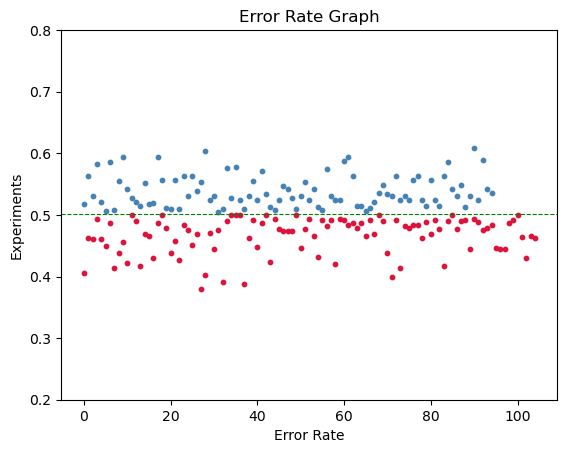

In [64]:
import matplotlib.pyplot as plt
F = []
for i in range(200):
    f = Exam()
    F.append(f)

up = [i for i in F if i >= np.mean(F)]
down = [i for i in F if i < np.mean(F)]
x1 = range(len(up))
x2 = range(len(down))

plt.scatter(x1, up, color='#4682B4', s=10)
plt.scatter(x2, down, color='#DC143C', s=10)
plt.xlabel("Error Rate")
plt.ylabel("Experiments")
plt.axhline(y=np.mean(F), color='green', linestyle='--', linewidth=0.8, label="Baseline (y=0.5)")
plt.ylim(0.2, 0.8)
plt.title("Error Rate Graph")
plt.show()

In [9]:
###样本代入每层检验
model = net # 替换成你的模型
model.eval()  # 设置为评估模式，避免 dropout 等随机性

# 要记录每一层输出的字典
layer_outputs = {}

# 定义一个 hook 函数，保存每一层的输出
def hook_fn(module, input, output):
    layer_outputs[module] = output.detach()  # detach 是为了避免梯度

# 为模型的每一层注册 hook
hooks = []
for layer in model.children():
    hooks.append(layer.register_forward_hook(hook_fn))

# 准备一个输入样本（替换成你的样本）
input_sample = torch.randint(0,2,(1, 2, 8, 16), dtype=torch.float32) # 假设输入是一个 3x224x224 的图像
output = model(input_sample)

# 打印每一层的输出
for layer, output in layer_outputs.items():
    print(f"Layer: {layer}\nOutput Shape: {output.shape}\nValues: {output}\n")

# 记得清除 hooks
for hook in hooks:
    hook.remove()

Layer: Conv2d(2, 6, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
Output Shape: torch.Size([1, 6, 9, 17])
Values: tensor([[[[ 7.6229e-02, -6.0363e-02, -2.4675e-01, -2.3543e-01, -1.5989e-01,
           -2.7309e-02,  3.6109e-03,  1.9807e-04, -2.1370e-01, -1.2196e-01,
           -3.4382e-02, -2.6167e-01, -2.9065e-01,  1.3022e-01, -1.2247e-01,
           -1.1471e-01, -3.2638e-01],
          [ 4.0457e-02, -1.8042e-01, -1.0969e-01, -2.3346e-01,  4.6323e-02,
           -1.5095e-01, -1.5628e-01, -1.6014e-01, -3.4527e-01, -2.9171e-01,
           -2.1108e-01, -1.5136e-01, -1.5662e-01, -9.7588e-02,  2.7206e-02,
           -2.3012e-01, -3.4768e-01],
          [ 6.0760e-03, -1.0909e-01, -1.0806e-01, -5.2056e-01, -3.3384e-01,
           -7.7834e-01, -2.0751e-01, -7.7029e-02,  6.2414e-02, -3.0631e-01,
           -2.5847e-01, -3.0175e-01, -2.3167e-01, -4.6672e-01, -1.5711e-01,
           -1.8232e-01, -1.9075e-01],
          [-1.4914e-01,  6.3952e-02, -3.0427e-01, -3.7355e-01, -3.5173e-01,
       

In [10]:
###每层参数
for name, param in net.state_dict().items():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param}")

Layer: 0.weight | Size: torch.Size([6, 2, 4, 4]) | Values: tensor([[[[ 7.8346e-02,  4.8121e-02,  1.3638e-02, -6.8198e-02],
          [-7.3538e-02,  1.9616e-02, -2.0141e-02, -1.4161e-02],
          [-1.2526e-01, -3.8862e-02,  2.7471e-02,  9.7136e-02],
          [ 4.9640e-02, -5.9800e-02,  6.2907e-03, -1.5235e-02]],

         [[-3.7510e-02, -5.2027e-02, -5.2944e-02, -8.5589e-02],
          [ 3.9140e-02, -2.7659e-02,  4.6036e-02, -3.4533e-02],
          [-5.6469e-02, -7.2055e-02, -1.9399e-02, -2.6712e-02],
          [-7.1570e-02,  7.2438e-02,  6.8087e-02,  3.8404e-02]]],


        [[[-5.1283e-02, -5.2056e-02,  4.6627e-02, -5.1196e-02],
          [ 9.2748e-02, -3.9305e-02,  1.5465e-02,  2.1709e-02],
          [ 6.8977e-03,  3.0253e-02, -5.0501e-02, -3.2414e-02],
          [ 6.0225e-03, -3.9434e-03, -2.3860e-02, -2.4030e-02]],

         [[-4.4506e-02, -9.4784e-02,  6.8353e-02,  3.3578e-02],
          [-5.1164e-02,  2.1686e-02, -5.7401e-02, -3.5335e-02],
          [-4.5108e-02, -3.4561e-02, 

In [11]:
print(net)

Sequential(
  (0): Conv2d(2, 6, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (1): MaxPool2d(kernel_size=4, stride=1, padding=2, dilation=1, ceil_mode=False)
  (2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
  (3): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=1680, out_features=256, bias=True)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): Linear(in_features=128, out_features=128, bias=True)
)
